<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/unsupervised_learning/experimetal_stock_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 10.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf
tickers =['IDEA.ns',
 'IRCTC.ns',
 'NAM-INDIA.ns',
 'NATIONALUM.ns',
 'GLENMARK.ns',
 'UBL.ns',
 'IBULHSGFIN.ns',
 'HAVELLS.ns',
 'DIVISLAB.ns',
 'NMDC.ns',
 'GRANULES.ns',
 'MCDOWELL-N.ns',
 'BHARTIARTL.ns',
 'PEL.ns',
 'BALKRISIND.ns',
 'BATAINDIA.ns',
 'INDUSTOWER.ns',
 'DLF.ns',
 'JINDALSTEL.ns',
 'INDHOTEL.ns',
 'ULTRACEMCO.ns',
 'AUROPHARMA.ns',
 'BHEL.ns',
 'TATASTEEL.ns',
 'BIOCON.ns',
 'LUPIN.ns',
 'POWERGRID.ns',
 'PFC.ns',
 'RELIANCE.ns',
 'SRF.ns',
 'IDFCFIRSTB.ns',
 'GODREJPROP.ns',
 'NAVINFLUOR.ns',
 'VEDL.ns',
 'RAMCOCEM.ns',
 'JUBLFOOD.ns',
 'HINDALCO.ns',
 'PNB.ns',
 'ACC.ns',
 'MRF.ns',
 'SAIL.ns',
 'GRASIM.ns',
 'SUNPHARMA.ns',
 'ITC.ns',
 'METROPOLIS.ns',
 'ICICIPRULI.ns',
 'VOLTAS.ns',
 'HDFCLIFE.ns',
 'CADILAHC.ns',
 'APOLLOHOSP.ns',
 'EXIDEIND.ns',
 'M&MFIN.ns',
 'ALKEM.ns',
 'MFSL.ns',
 'HEROMOTOCO.ns',
 'MOTHERSUMI.ns',
 'APLLTD.ns',
 'RECLTD.ns',
 'LT.ns',
 'HINDPETRO.ns',
 'GUJGASLTD.ns',
 'PETRONET.ns',
 'BPCL.ns',
 'JSWSTEEL.ns',
 'DEEPAKNTR.ns',
 'SUNTV.ns',
 'MPHASIS.ns',
 'AARTIIND.ns',
 'CANBK.ns',
 'PIIND.ns',
 'BERGEPAINT.ns',
 'GODREJCP.ns',
 'PFIZER.ns',
 'TATACHEM.ns',
 'GAIL.ns',
 'CUB.ns',
 'TATAMOTORS.ns',
 'TVSMOTOR.ns',
 'HINDUNILVR.ns',
 'DRREDDY.ns',
 'ASIANPAINT.ns',
 'WIPRO.ns',
 'CIPLA.ns',
 'MINDTREE.ns',
 'HDFCBANK.ns',
 'M&M.ns',
 'BEL.ns',
 'PAGEIND.ns',
 'PVR.ns',
 'GMRINFRA.ns',
 'BAJFINANCE.ns',
 'UPL.ns',
 'TORNTPOWER.ns',
 'NESTLEIND.ns',
 'HDFC.ns',
 'IOC.ns',
 'RBLBANK.ns',
 'MARUTI.ns',
 'BAJAJ-AUTO.ns',
 'TATAPOWER.ns',
 'KOTAKBANK.ns',
 'MUTHOOTFIN.ns',
 'APOLLOTYRE.ns',
 'CHOLAFIN.ns',
 'SBIN.ns',
 'TCS.ns',
 'PIDILITIND.ns',
 'COLPAL.ns',
 'SBILIFE.ns',
 'BHARATFORG.ns',
 'ONGC.ns',
 'BOSCHLTD.ns',
 'TITAN.ns',
 'LALPATHLAB.ns',
 'AXISBANK.ns',
 'LICHSGFIN.ns',
 'TORNTPHARM.ns',
 'ZEEL.ns',
 'L&TFH.ns',
 'DABUR.ns',
 'BRITANNIA.ns',
 'ABFRL.ns',
 'AMBUJACEM.ns',
 'ESCORTS.ns',
 'COALINDIA.ns',
 'AMARAJABAT.ns',
 'HDFCAMC.ns',
 'FEDERALBNK.ns',
 'ASHOKLEY.ns',
 'NTPC.ns',
 'SRTRANSFIN.ns',
 'INDIGO.ns',
 'TECHM.ns',
 'COFORGE.ns',
 'ADANIENT.ns',
 'MANAPPURAM.ns',
 'MGL.ns',
 'ICICIBANK.ns',
 'SIEMENS.ns',
 'CONCOR.ns',
 'INDUSINDBK.ns',
 'SHREECEM.ns',
 'TATACONSUM.ns',
 'MARICO.ns',
 'IGL.ns',
 'ADANIPORTS.ns',
 'BAJAJFINSV.ns',
 'INFY.ns',
 'COROMANDEL.ns',
 'CUMMINSIND.ns',
 'AUBANK.ns',
 'ICICIGI.ns',
 'NAUKRI.ns',
 'EICHERMOT.ns',
 'LTTS.ns',
 'BANKBARODA.ns',
 'TRENT.ns',
 'LTI.ns',
 'BANDHANBNK.ns',
 'HCLTECH.ns']
start_date = '2018-01-01'

df = yf.download(tickers, start_date)[['Adj Close']]

[*********************100%***********************]  160 of 160 completed


In [4]:
returns = df.pct_change().mean() * (10*12)
std = df.pct_change().std() * np.sqrt((10*12))
ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ["Returns","Standard Deviation"]

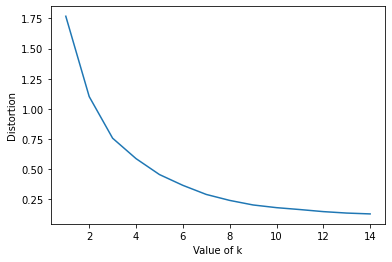

In [5]:
from sklearn.cluster import KMeans
X =  ret_var.values
sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1,15), sse)
plt.xlabel("Value of k")
plt.ylabel("Distortion")
plt.show()

In [6]:
stdOrder = ret_var.sort_values('Standard Deviation',ascending=False)
first_symbol = stdOrder.index[0]
ret_var.drop(first_symbol,inplace=True)
X = ret_var.values

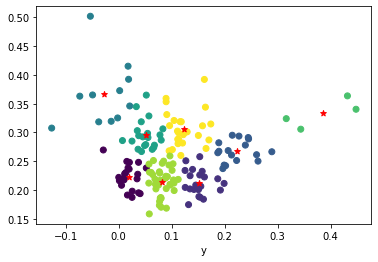

In [7]:
kmeans =KMeans(n_clusters = 8).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="viridis")
plt.xlabel("y")
plt.scatter(centroids[:,0], centroids[:,1],color="red",marker="*")
plt.show()

In [8]:
stocks = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']
x_df = pd.DataFrame(X, columns = ["Returns", "Volatitity"])
closerv = pd.concat([stockClusters,x_df],axis=1)
closerv = closerv.set_index("Symbol")
closerv

,Cluster,Returns,Volatitity
Symbol,,,
"(Adj Close, AARTIIND.NS)",2,0.196505,0.237219
"(Adj Close, ABFRL.NS)",7,0.111892,0.280557
"(Adj Close, ACC.NS)",6,0.069170,0.210215
"(Adj Close, ADANIENT.NS)",5,0.431627,0.363541
"(Adj Close, ADANIPORTS.NS)",7,0.117205,0.260050
...,...,...,...
"(Adj Close, UPL.NS)",7,0.101169,0.270219
"(Adj Close, VEDL.NS)",7,0.104421,0.320815
"(Adj Close, VOLTAS.NS)",6,0.112209,0.218487


To understand the k-means performance, we resort to the silhouette method, which examines the mean intracluster and the mean near-cluster distance for each sample. The value obtained is considered the silhouette score; it measures the separation. A silhouette score ranges from -1 to 1. Specifically, -1 shows poor model performance, and 1 shows optimal model performance. Listing 5-7 finds the score.

['AMARAJABAT.NS', 'BAJAJ-AUTO.NS', 'BOSCHLTD.NS', 'CADILAHC.NS', 'COALINDIA.NS', 'CUB.NS', 'CUMMINSIND.NS', 'EICHERMOT.NS', 'EXIDEIND.NS', 'GAIL.NS', 'HEROMOTOCO.NS', 'IOC.NS', 'ITC.NS', 'LUPIN.NS', 'MARUTI.NS', 'MGL.NS', 'MRF.NS', 'NTPC.NS', 'PETRONET.NS', 'SUNTV.NS', 'TVSMOTOR.NS']
[*********************100%***********************]  21 of 21 completed
Cluster :  0
['ASIANPAINT.NS', 'BALKRISIND.NS', 'BATAINDIA.NS', 'BERGEPAINT.NS', 'DIVISLAB.NS', 'HAVELLS.NS', 'HCLTECH.NS', 'ICICIBANK.NS', 'INFY.NS', 'NESTLEIND.NS', 'PFIZER.NS', 'PIDILITIND.NS', 'PIIND.NS', 'RELIANCE.NS', 'TATACONSUM.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TORNTPOWER.NS', 'WIPRO.NS']
[*********************100%***********************]  21 of 21 completed
Cluster :  1
['AARTIIND.NS', 'APOLLOHOSP.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'GUJGASLTD.NS', 'JUBLFOOD.NS', 'LALPATHLAB.NS', 'LTI.NS', 'LTTS.NS', 'METROPOLIS.NS', 'MINDTREE.NS', 'MPHASIS.NS', 'MUTHOOTFIN.NS', 'NAUKRI.NS', 'NAVINFLUOR.NS', 'SRF.NS', 

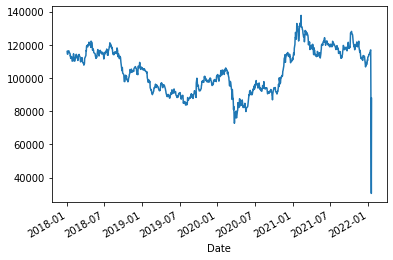

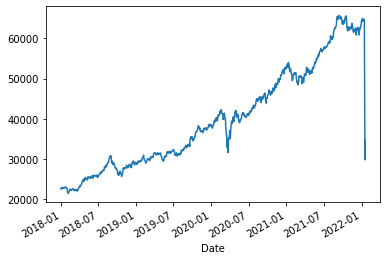

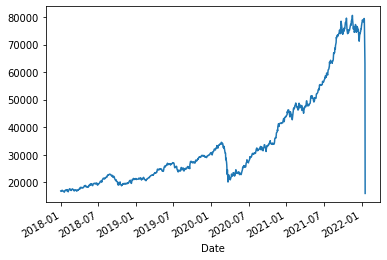

In [32]:
for j in range(0,3):
  lst=closerv[closerv['Cluster']==j].reset_index()['Symbol'].tolist()
  stocklst=[]
  for i in lst:
    stocklst.append(str(i[1]))
    
  print(stocklst)   
  data=yf.download(stocklst,'2018-01-01')['Adj Close']
  fig, ax = plt.subplots()
  data['sum']=data.sum(axis=1)
  
  data['sum'].plot(); 
  print('Cluster : ' , j) 

[*********************100%***********************]  21 of 21 completed


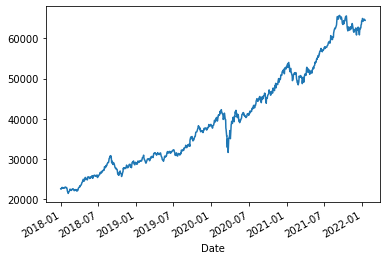